In [1]:
from qiskit.opflow import Z,I
from qiskit.algorithms import QAOA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit import Aer
from qiskit.algorithms.optimizers import COBYLA

H1 = (Z^I^Z^I^I^I) + (Z^I^I^I^Z^I) + (Z^I^I^I^I^Z) + (I^Z^I^I^Z^I) + (I^Z^I^I^I^Z) + (I^I^Z^Z^I^I) + (I^I^Z^I^Z^I) + (I^I^I^I^Z^Z)# Define Z_0Z_1

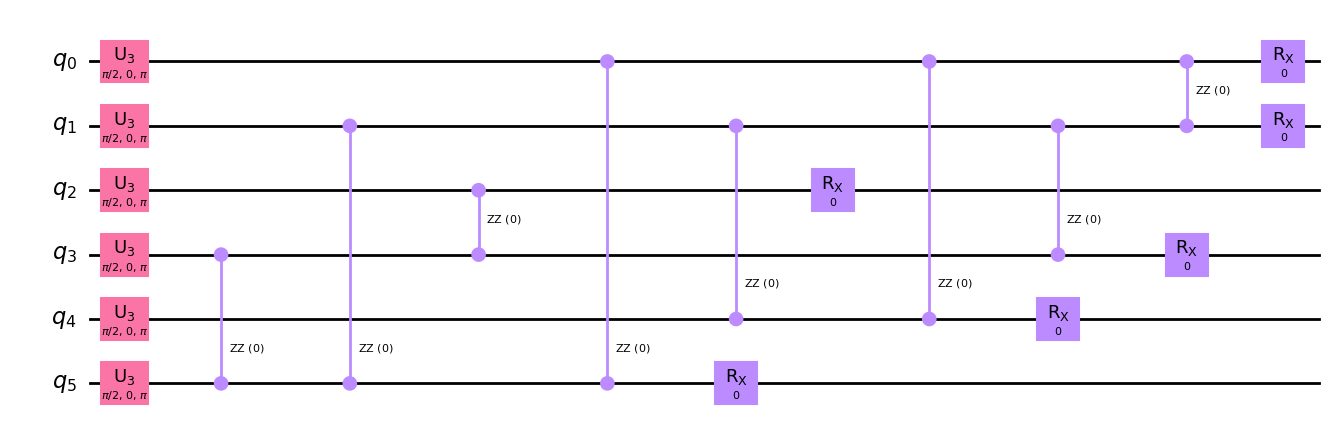

In [2]:
qaoa = QAOA(reps = 1)
circuit = qaoa.construct_circuit([0,0],H1)[0]
circuit.decompose().decompose().draw(output="mpl")

In [28]:
seed = pow(2, 8)
shot = pow(10, 6)
print('------------------------------------------------------')
algorithm_globals.random_seed = seed
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
seed_simulator=seed, seed_transpiler=seed,shots = shot)
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
result = qaoa.compute_minimum_eigenvalue(H1)
mydict = {key:value for key, value in result.eigenstate.items() if value > 0.19}
print(mydict)

------------------------------------------------------
{'000111': 0.24841296262473905, '001001': 0.20629590398260456, '001011': 0.2263183598385248, '011001': 0.22584950741588966, '011010': 0.1908428673018722, '100101': 0.19114654064355965, '100110': 0.22573435715459886, '110100': 0.22638683707318322, '110110': 0.20625227271475097, '111000': 0.24799798386277255}
